In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as stats
matplotlib.style.use('ggplot')
from sklearn import datasets, linear_model


In [2]:
filename = "new_auto_mpg.csv"
column_names= ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin', 'name']
df = pd.read_csv (filename, names = column_names)

print (df.shape)
df.head(5)

(399, 9)


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9
1,18,8,307,130.0,3504,12,70,1,chevrolet chevelle malibu
2,15,8,350,165.0,3693,11.5,70,1,buick skylark 320
3,18,8,318,150.0,3436,11,70,1,plymouth satellite
4,16,8,304,150.0,3433,12,70,1,amc rebel sst


In [3]:
df.drop(df.head(1).index, inplace=True)
df.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
1,18,8,307,130.0,3504,12,70,1,chevrolet chevelle malibu
2,15,8,350,165.0,3693,11.5,70,1,buick skylark 320
3,18,8,318,150.0,3436,11,70,1,plymouth satellite
4,16,8,304,150.0,3433,12,70,1,amc rebel sst
5,17,8,302,140.0,3449,10.5,70,1,ford torino


In [4]:
horsepower_missing_ind = df[df.horsepower=='?'].index
df.loc[horsepower_missing_ind]

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
33,25,4,98,?,2046,19,71,1,ford pinto
127,21,6,200,?,2875,17,74,1,ford maverick
331,40.9,4,85,?,1835,17.3,80,2,renault lecar deluxe
337,23.6,4,140,?,2905,14.3,80,1,ford mustang cobra
355,34.5,4,100,?,2320,15.8,81,2,renault 18i
375,23,4,151,?,3035,20.5,82,1,amc concord dl


In [6]:
df.dtypes

mpg             object
cylinders       object
displacement    object
horsepower      object
weight          object
acceleration    object
year            object
origin          object
name            object
dtype: object

In [7]:
df.loc[horsepower_missing_ind, 'horsepower'] = float('nan')
df[['mpg','cylinders','displacement','horsepower', 'weight', 'acceleration', 'year', 'origin']] = df[['mpg','cylinders','displacement','horsepower','weight','acceleration','year','origin']].apply(pd.to_numeric)

In [8]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
year              int64
origin            int64
name             object
dtype: object

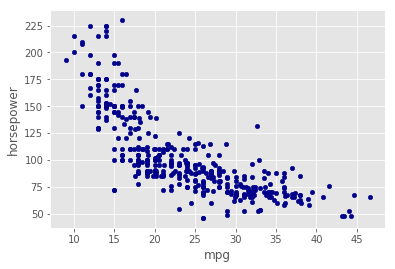

In [9]:
filename2 = "no_comma_auto_mpg.csv"
df2 = pd.read_csv (filename2, names = column_names)

#First row contains columns such as "Column 1", "Column2" etc. I had to delete them first. Clearing the first row:
df2.drop(df2.head(1).index, inplace=True)
#df2 wanted to see how my new data frame looks like
#df2.dtypes Ran this code and saw that all data is stored as "objects".So, I had to convert all to numeric before doing scattering with this data.
# Otherwise, it gives an error
df2[['mpg','cylinders','displacement','horsepower', 'weight', 'acceleration', 'year', 'origin']] = df2[['mpg','cylinders','displacement','horsepower','weight','acceleration','year','origin']].apply(pd.to_numeric)
ax1 = df2.plot.scatter(x='mpg',y='horsepower', c="DarkBlue")

In [10]:
from sklearn import linear_model

In [11]:
# Initialize model
regression_model = linear_model.LinearRegression()

# Train the model using the no_comma_auto_mpg data
regression_model.fit(X = pd.DataFrame(df2["mpg"]), 
                     y = df2["horsepower"])

# Check trained model y-intercept
print(regression_model.intercept_)

# Check trained model coefficients
print(regression_model.coef_)

194.4756431901867
[-3.83888803]


In [12]:
# The output above shows the model intercept and coefficients used to create the best fit line. 
# In this case the y-intercept term is set to 194.4756 and the coefficient for the mpg variable is -3.8388. 
# In other words, the model fit the line horsepower = 194.4756 - 3.8388*mpg.
# Now, we need to find the variance.It is done so by using the model.score() function:

In [13]:
regression_model.score(X = pd.DataFrame(df2["mpg"]), 
                       y = df2["horsepower"])

0.6059482578894348

In [14]:
# The output of the score function for linear regression is "R-squared" (variance).
# Variance is a value that ranges from 0 to 1 which describes the proportion of variance in the response variable that is explained by the model.
# In this case, mpg explains 60% of the variance in horsepower.
# The R-squared measure is based on the residuals: differences between what the model predicts for each data point and the actual value of each data point.
# We can extract the model's residuals by making a prediction with the model on the data and then subtracting the actual value from each prediction:

In [15]:
train_prediction = regression_model.predict(X = pd.DataFrame(df2["mpg"]))

# Actual - prediction = residuals
residuals = df2["horsepower"] - train_prediction

residuals.describe()

count    3.920000e+02
mean     1.450087e-14
std      2.416226e+01
min     -6.489232e+01
25%     -1.571566e+01
50%     -2.093713e+00
75%      1.310768e+01
max      9.694657e+01
Name: horsepower, dtype: float64

In [16]:
# R-squared is calculated as 1 - (SSResiduals/SSTotal) where SSResiduals is the sum of the squares of the model residuals and SSTotal is the sum of the squares of the difference between each data point and the mean of the data.
# We could calculate R-squared by hand like this:

In [17]:
SSResiduals = (residuals**2).sum()

SSTotal = ((df2["horsepower"] - df2["horsepower"].mean())**2).sum()

# R-squared
1 - (SSResiduals/SSTotal)

0.6059482578894348

In [18]:
# Now we can plot the line it fits on our scatterplot to see how well it fits the data:

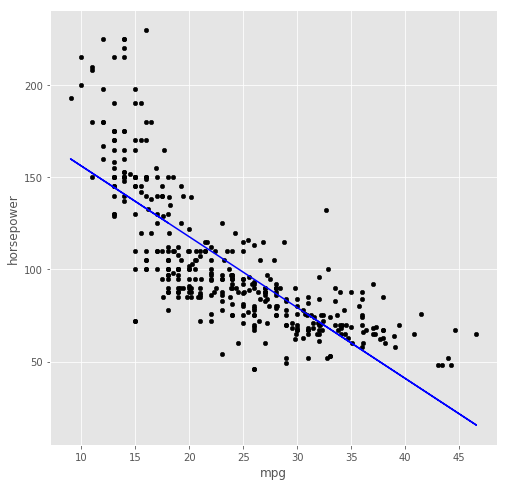

In [20]:
df2.plot(kind="scatter",
           x="mpg",
           y="horsepower",
           figsize=(8,8),
           color="black")

# Plot regression line
plt.plot(df2["mpg"],      # Explanitory variable
         train_prediction,  # Predicted values
         color="blue")

((array([-2.91707214, -2.62850148, -2.46572851, -2.35005202, -2.25924608,
         -2.18395743, -2.11932901, -2.06250202, -2.01164606, -1.96551592,
         -1.9232246 , -1.88411705, -1.84769527, -1.81357142, -1.78143737,
         -1.75104405, -1.72218717, -1.69469702, -1.66843096, -1.64326798,
         -1.61910443, -1.59585088, -1.57342957, -1.55177245, -1.53081964,
         -1.51051812, -1.49082075, -1.47168538, -1.4530742 , -1.43495315,
         -1.41729142, -1.40006105, -1.3832366 , -1.36679482, -1.35071445,
         -1.33497596, -1.31956136, -1.30445409, -1.2896388 , -1.27510129,
         -1.26082838, -1.24680779, -1.23302811, -1.21947866, -1.20614946,
         -1.19303118, -1.18011506, -1.16739287, -1.15485687, -1.14249978,
         -1.13031472, -1.11829522, -1.10643514, -1.09472868, -1.08317036,
         -1.07175496, -1.06047754, -1.04933341, -1.03831809, -1.02742733,
         -1.0166571 , -1.00600352, -0.99546292, -0.98503177, -0.97470672,
         -0.96448454, -0.95436217, -0.

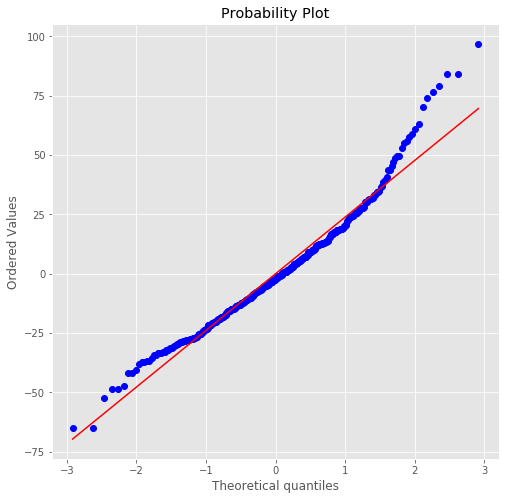

In [21]:
plt.figure(figsize=(8,8))

stats.probplot(residuals, dist="norm", plot=plt)

In [22]:
# When residuals are normally distributed, they tend to lie along the straight line on the Q-Q plot.
# In this case residuals appear to follow a nice linear pattern
# After making model predictions, it is useful to calculate root-mean-squared-error. 
# Root mean squared error (RMSE) is a common evaluation metric for predictions involving real numbers. 
# Root mean squared error is square root of the average of the squared error (residuals.). 
# Lower values of RMSE means a better fit


In [23]:
def rmse(predicted, targets):
    """
    Computes root mean squared error of two numpy ndarrays
    
    Args:
        predicted: an ndarray of predictions
        targets: an ndarray of target values
    
    Returns:
        The root mean squared error as a float
    """
    return (np.sqrt(np.mean((targets-predicted)**2)))

rmse(train_prediction, df2["horsepower"])

24.131425079734058

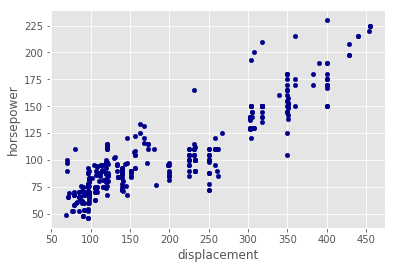

In [24]:
filename2 = "no_comma_auto_mpg.csv"
df2 = pd.read_csv (filename2, names = column_names)
#First row contains columns such as "Column 1", "Column2" etc. I had to delete them first. Clearing the first row:
df2.drop(df2.head(1).index, inplace=True)
#df2 wanted to see how my new data frame looks like
#df2.dtypes Ran this code and saw that all data is stored as "objects".So, I had to convert all to numeric before doing scattering with this data.
# Otherwise, it gives an error
df2[['mpg','cylinders','displacement','horsepower', 'weight', 'acceleration', 'year', 'origin']] = df2[['mpg','cylinders','displacement','horsepower','weight','acceleration','year','origin']].apply(pd.to_numeric)

ax2 = df.plot.scatter(x='displacement',y='horsepower', c="DarkBlue")

In [25]:
from sklearn import linear_model

In [26]:
# Initialize model
regression_model2 = linear_model.LinearRegression()

# Train the model using the no_comma_auto_mpg data
regression_model2.fit(X = pd.DataFrame(df2["displacement"]), 
                     y = df2["horsepower"])

# Check trained model y-intercept
print(regression_model2.intercept_)

# Check trained model coefficients
print(regression_model2.coef_)

40.30610849738838
[0.33003767]


In [27]:
# The output above shows the model intercept and coefficients used to create the best fit line. 
# In this case the y-intercept term is set to 40.3061 and the coefficient for the displacement variable is 0.3300. 
# In other words, the model fit the line horsepower = 40.3061 + 0.3300*displacement.
# Now, we need to find the variance.It is done so by using the model.score() function:

In [28]:
regression_model2.score(X = pd.DataFrame(df2["displacement"]), 
                       y = df2["horsepower"])

0.805070127357131

In [29]:
# The output of the score function for linear regression is "R-squared" (variance).
# Variance is a value that ranges from 0 to 1 which describes the proportion of variance in the response variable that is explained by the model.
# In this case, displacement explains 80% of the variance in horsepower.
# The R-squared measure is based on the residuals: differences between what the model predicts for each data point and the actual value of each data point.
# We can extract the model's residuals by making a prediction with the model on the data and then subtracting the actual value from each prediction:

In [30]:
train_prediction2 = regression_model2.predict(X = pd.DataFrame(df2["displacement"]))

# Actual - prediction = residuals
residuals2 = df2["horsepower"] - train_prediction2

residuals2.describe()

count    3.920000e+02
mean    -7.069175e-15
std      1.699418e+01
min     -5.081929e+01
25%     -1.069500e+01
50%     -8.192914e-01
75%      8.676471e+00
max      6.474191e+01
Name: horsepower, dtype: float64

In [31]:
# R-squared is calculated as 1 - (SSResiduals/SSTotal) where SSResiduals is the sum of the squares of the model residuals and SSTotal is the sum of the squares of the difference between each data point and the mean of the data.
# We could calculate R-squared by hand like this:

In [32]:
SSResiduals2 = (residuals2**2).sum()

SSTotal2 = ((df2["horsepower"] - df2["horsepower"].mean())**2).sum()

# R-squared
1 - (SSResiduals2/SSTotal2)

0.805070127357131

In [33]:
# Now we can plot the line it fits on our scatterplot to see how well it fits the data:

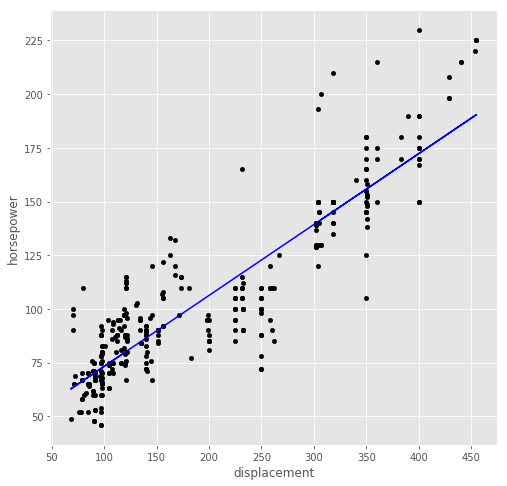

In [34]:
df2.plot(kind="scatter",
           x="displacement",
           y="horsepower",
           figsize=(8,8),
           color="black")

# Plot regression line
plt.plot(df2["displacement"],      # Explanitory variable
         train_prediction2,  # Predicted values
         color="blue")

((array([-2.91707214, -2.62850148, -2.46572851, -2.35005202, -2.25924608,
         -2.18395743, -2.11932901, -2.06250202, -2.01164606, -1.96551592,
         -1.9232246 , -1.88411705, -1.84769527, -1.81357142, -1.78143737,
         -1.75104405, -1.72218717, -1.69469702, -1.66843096, -1.64326798,
         -1.61910443, -1.59585088, -1.57342957, -1.55177245, -1.53081964,
         -1.51051812, -1.49082075, -1.47168538, -1.4530742 , -1.43495315,
         -1.41729142, -1.40006105, -1.3832366 , -1.36679482, -1.35071445,
         -1.33497596, -1.31956136, -1.30445409, -1.2896388 , -1.27510129,
         -1.26082838, -1.24680779, -1.23302811, -1.21947866, -1.20614946,
         -1.19303118, -1.18011506, -1.16739287, -1.15485687, -1.14249978,
         -1.13031472, -1.11829522, -1.10643514, -1.09472868, -1.08317036,
         -1.07175496, -1.06047754, -1.04933341, -1.03831809, -1.02742733,
         -1.0166571 , -1.00600352, -0.99546292, -0.98503177, -0.97470672,
         -0.96448454, -0.95436217, -0.

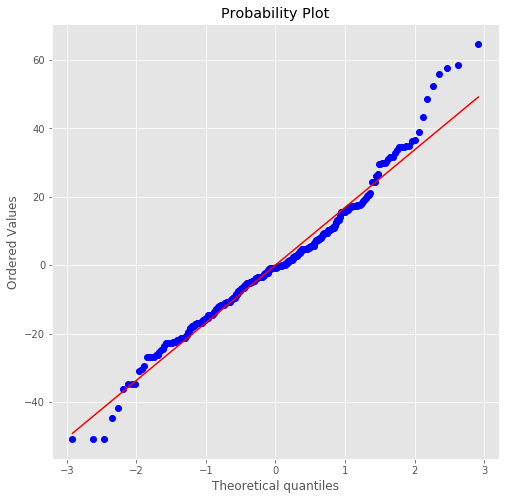

In [35]:
plt.figure(figsize=(8,8))

stats.probplot(residuals2, dist="norm", plot=plt)

In [36]:
# When residuals are normally distributed, they tend to lie along the straight line on the Q-Q plot.
# In this case residuals appear to follow a nice linear pattern
# After making model predictions, it is useful to calculate root-mean-squared-error. 
# Root mean squared error (RMSE) is a common evaluation metric for predictions involving real numbers. 
# Root mean squared error is square root of the average of the squared error (residuals.). 
# Lower values of RMSE means a better fit


In [37]:
def rmse(predicted, targets):
    """
    Computes root mean squared error of two numpy ndarrays
    
    Args:
        predicted: an ndarray of predictions
        targets: an ndarray of target values
    
    Returns:
        The root mean squared error as a float
    """
    return (np.sqrt(np.mean((targets-predicted)**2)))

rmse(train_prediction2, df2["horsepower"])

16.97248929735085

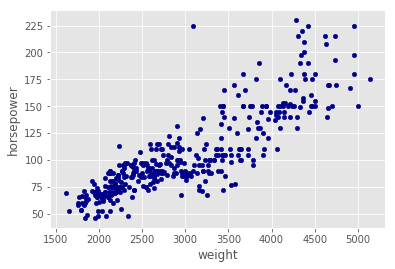

In [38]:
filename2 = "no_comma_auto_mpg.csv"
df2 = pd.read_csv (filename2, names = column_names)

#First row contains columns such as "Column 1", "Column2" etc. I had to delete them first. Clearing the first row:
df2.drop(df2.head(1).index, inplace=True)
#df2 wanted to see how my new data frame looks like
#df2.dtypes Ran this code and saw that all data is stored as "objects".So, I had to convert all to numeric before doing scattering with this data.
# Otherwise, it gives an error
df2[['mpg','cylinders','displacement','horsepower', 'weight', 'acceleration', 'year', 'origin']] = df2[['mpg','cylinders','displacement','horsepower','weight','acceleration','year','origin']].apply(pd.to_numeric)
ax3 = df2.plot.scatter(x='weight',y='horsepower', c="DarkBlue")

In [39]:
from sklearn import linear_model


In [40]:
# Initialize model
regression_model = linear_model.LinearRegression()

# Train the model using the no_comma_auto_mpg data
regression_model.fit(X = pd.DataFrame(df2["weight"]), 
                     y = df2["horsepower"])

# Check trained model y-intercept
print(regression_model.intercept_)

# Check trained model coefficients
print(regression_model.coef_)

-12.1834847034594
[0.03917702]


In [41]:
# The output above shows the model intercept and coefficients used to create the best fit line. 
# In this case the y-intercept term is set to -12.1834 and the coefficient for the weight variable is 0.0391. 
# In other words, the model fit the line horsepower = -12.1834 + 0.0391*weight.
# Now, we need to find the variance.It is done so by using the model.score() function:

In [42]:
regression_model.score(X = pd.DataFrame(df2["weight"]), 
                       y = df2["horsepower"])

0.74742549968982

In [43]:
# The output of the score function for linear regression is "R-squared" (variance).
# Variance is a value that ranges from 0 to 1 which describes the proportion of variance in the response variable that is explained by the model.
# In this case, mpg explains 74% of the variance in horsepower.
# The R-squared measure is based on the residuals: differences between what the model predicts for each data point and the actual value of each data point.
# We can extract the model's residuals by making a prediction with the model on the data and then subtracting the actual value from each prediction:

In [44]:
train_prediction3 = regression_model.predict(X = pd.DataFrame(df2["weight"]))

# Actual - prediction = residuals
residuals3 = df2["horsepower"] - train_prediction3

residuals3.describe()

count    3.920000e+02
mean     1.123818e-15
std      1.934442e+01
min     -5.027204e+01
25%     -1.228542e+01
50%     -5.571301e-01
75%      9.062734e+00
max      1.162832e+02
Name: horsepower, dtype: float64

In [45]:
# R-squared is calculated as 1 - (SSResiduals/SSTotal) where SSResiduals is the sum of the squares of the model residuals and SSTotal is the sum of the squares of the difference between each data point and the mean of the data.
# We could calculate R-squared by hand like this:

In [46]:
SSResiduals3 = (residuals3**2).sum()

SSTotal3 = ((df2["horsepower"] - df2["horsepower"].mean())**2).sum()

# R-squared
1 - (SSResiduals3/SSTotal3)

0.74742549968982

In [47]:
# Now we can plot the line it fits on our scatterplot to see how well it fits the data:

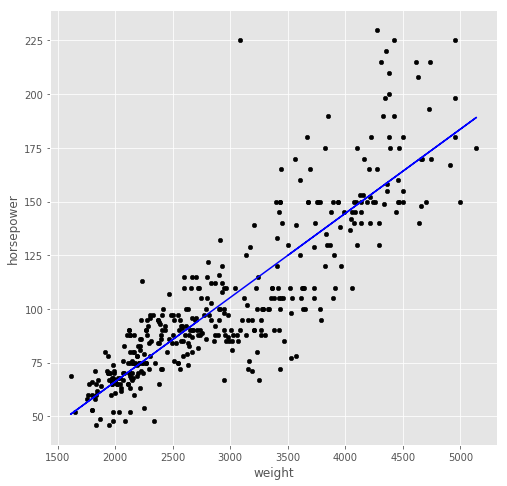

In [48]:
df2.plot(kind="scatter",
           x="weight",
           y="horsepower",
           figsize=(8,8),
           color="black")

# Plot regression line
plt.plot(df2["weight"],      # Explanitory variable
         train_prediction3,  # Predicted values
         color="blue")

((array([-2.91707214, -2.62850148, -2.46572851, -2.35005202, -2.25924608,
         -2.18395743, -2.11932901, -2.06250202, -2.01164606, -1.96551592,
         -1.9232246 , -1.88411705, -1.84769527, -1.81357142, -1.78143737,
         -1.75104405, -1.72218717, -1.69469702, -1.66843096, -1.64326798,
         -1.61910443, -1.59585088, -1.57342957, -1.55177245, -1.53081964,
         -1.51051812, -1.49082075, -1.47168538, -1.4530742 , -1.43495315,
         -1.41729142, -1.40006105, -1.3832366 , -1.36679482, -1.35071445,
         -1.33497596, -1.31956136, -1.30445409, -1.2896388 , -1.27510129,
         -1.26082838, -1.24680779, -1.23302811, -1.21947866, -1.20614946,
         -1.19303118, -1.18011506, -1.16739287, -1.15485687, -1.14249978,
         -1.13031472, -1.11829522, -1.10643514, -1.09472868, -1.08317036,
         -1.07175496, -1.06047754, -1.04933341, -1.03831809, -1.02742733,
         -1.0166571 , -1.00600352, -0.99546292, -0.98503177, -0.97470672,
         -0.96448454, -0.95436217, -0.

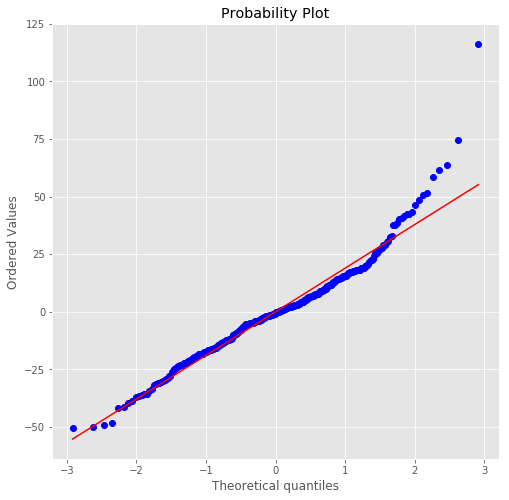

In [49]:
plt.figure(figsize=(8,8))

stats.probplot(residuals3, dist="norm", plot=plt)

In [50]:
# When residuals are normally distributed, they tend to lie along the straight line on the Q-Q plot.
# In this case residuals appear to follow a nice linear pattern
# After making model predictions, it is useful to calculate root-mean-squared-error. 
# Root mean squared error (RMSE) is a common evaluation metric for predictions involving real numbers. 
# Root mean squared error is square root of the average of the squared error (residuals.). 
# Lower values of RMSE means a better fit

In [51]:
def rmse(predicted, targets):
    """
    Computes root mean squared error of two numpy ndarrays
    
    Args:
        predicted: an ndarray of predictions
        targets: an ndarray of target values
    
    Returns:
        The root mean squared error as a float
    """
    return (np.sqrt(np.mean((targets-predicted)**2)))

rmse(train_prediction3, df2["horsepower"])

19.319731890134335

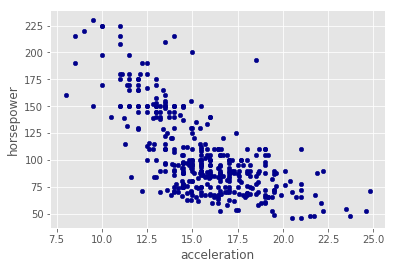

In [52]:
filename2 = "no_comma_auto_mpg.csv"
df2 = pd.read_csv (filename2, names = column_names)
#First row contains columns such as "Column 1", "Column2" etc. I had to delete them first. Clearing the first row:
df2.drop(df2.head(1).index, inplace=True)
#df2 wanted to see how my new data frame looks like
#df2.dtypes Ran this code and saw that all data is stored as "objects".So, I had to convert all to numeric before doing scattering with this data.
# Otherwise, it gives an error
df2[['mpg','cylinders','displacement','horsepower', 'weight', 'acceleration', 'year', 'origin']] = df2[['mpg','cylinders','displacement','horsepower','weight','acceleration','year','origin']].apply(pd.to_numeric)

ax4 = df.plot.scatter(x='acceleration',y='horsepower', c="DarkBlue")

In [53]:
from sklearn import linear_model

In [54]:
# Initialize model
regression_model = linear_model.LinearRegression()

# Train the model using the no_comma_auto_mpg data
regression_model.fit(X = pd.DataFrame(df2["acceleration"]), 
                     y = df2["horsepower"])

# Check trained model y-intercept
print(regression_model.intercept_)

# Check trained model coefficients
print(regression_model.coef_)

253.90744493958348
[-9.61552779]


In [55]:
# The output above shows the model intercept and coefficients used to create the best fit line. 
# In this case the y-intercept term is set to 253.9074 and the coefficient for the acceleration variable is -9.6155. 
# In other words, the model fit the line horsepower = 253.9074 - 9.6155*acceleration.
# Now, we need to find the variance.It is done so by using the model.score() function:

In [56]:
regression_model.score(X = pd.DataFrame(df2["acceleration"]), 
                       y = df2["horsepower"])

0.47499045146486873

In [57]:
# The output of the score function for linear regression is "R-squared" (variance).
# Variance is a value that ranges from 0 to 1 which describes the proportion of variance in the response variable that is explained by the model.
# In this case, mpg explains 47% of the variance in horsepower.
# The R-squared measure is based on the residuals: differences between what the model predicts for each data point and the actual value of each data point.
# We can extract the model's residuals by making a prediction with the model on the data and then subtracting the actual value from each prediction:

In [58]:
train_prediction4 = regression_model.predict(X = pd.DataFrame(df2["acceleration"]))

# Actual - prediction = residuals
residuals4 = df2["horsepower"] - train_prediction4

residuals4.describe()

count    3.920000e+02
mean    -7.395445e-15
std      2.788975e+01
min     -6.559801e+01
25%     -1.771298e+01
50%     -2.462882e+00
75%      1.787334e+01
max      1.169798e+02
Name: horsepower, dtype: float64

In [59]:
# R-squared is calculated as 1 - (SSResiduals/SSTotal) where SSResiduals is the sum of the squares of the model residuals and SSTotal is the sum of the squares of the difference between each data point and the mean of the data.
# We could calculate R-squared by hand like this:

In [60]:
SSResiduals4 = (residuals4**2).sum()

SSTotal4 = ((df2["horsepower"] - df2["horsepower"].mean())**2).sum()

# R-squared
1 - (SSResiduals4/SSTotal4)

0.47499045146486873

In [61]:
# Now we can plot the line it fits on our scatterplot to see how well it fits the data:

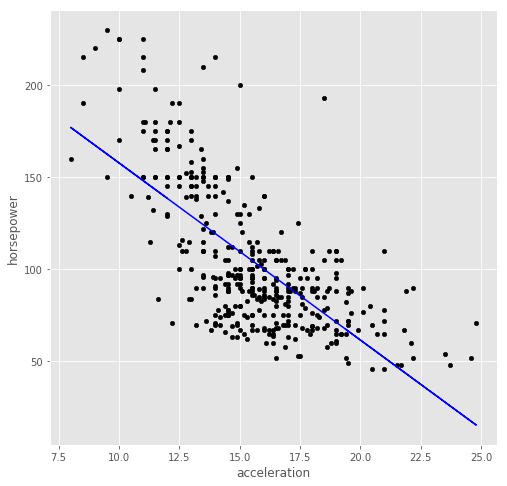

In [62]:
df2.plot(kind="scatter",
           x="acceleration",
           y="horsepower",
           figsize=(8,8),
           color="black")

# Plot regression line
plt.plot(df2["acceleration"],      # Explanitory variable
         train_prediction4,  # Predicted values
         color="blue")

((array([-2.91707214, -2.62850148, -2.46572851, -2.35005202, -2.25924608,
         -2.18395743, -2.11932901, -2.06250202, -2.01164606, -1.96551592,
         -1.9232246 , -1.88411705, -1.84769527, -1.81357142, -1.78143737,
         -1.75104405, -1.72218717, -1.69469702, -1.66843096, -1.64326798,
         -1.61910443, -1.59585088, -1.57342957, -1.55177245, -1.53081964,
         -1.51051812, -1.49082075, -1.47168538, -1.4530742 , -1.43495315,
         -1.41729142, -1.40006105, -1.3832366 , -1.36679482, -1.35071445,
         -1.33497596, -1.31956136, -1.30445409, -1.2896388 , -1.27510129,
         -1.26082838, -1.24680779, -1.23302811, -1.21947866, -1.20614946,
         -1.19303118, -1.18011506, -1.16739287, -1.15485687, -1.14249978,
         -1.13031472, -1.11829522, -1.10643514, -1.09472868, -1.08317036,
         -1.07175496, -1.06047754, -1.04933341, -1.03831809, -1.02742733,
         -1.0166571 , -1.00600352, -0.99546292, -0.98503177, -0.97470672,
         -0.96448454, -0.95436217, -0.

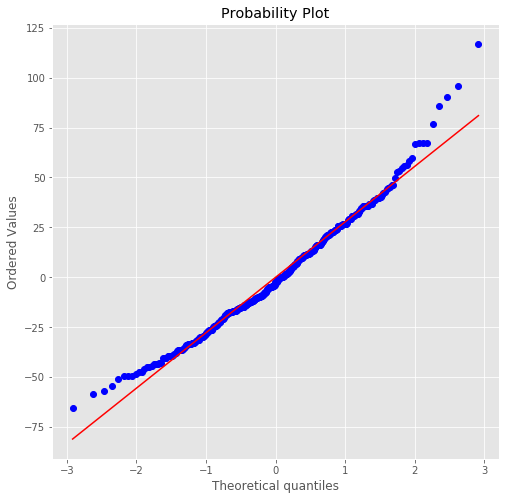

In [63]:
plt.figure(figsize=(8,8))

stats.probplot(residuals4, dist="norm", plot=plt)

In [64]:
# When residuals are normally distributed, they tend to lie along the straight line on the Q-Q plot.
# In this case residuals appear to follow a nice linear pattern
# After making model predictions, it is useful to calculate root-mean-squared-error. 
# Root mean squared error (RMSE) is a common evaluation metric for predictions involving real numbers. 
# Root mean squared error is square root of the average of the squared error (residuals.). 
# Lower values of RMSE means a better fit

In [65]:
def rmse(predicted, targets):
    """
    Computes root mean squared error of two numpy ndarrays
    
    Args:
        predicted: an ndarray of predictions
        targets: an ndarray of target values
    
    Returns:
        The root mean squared error as a float
    """
    return (np.sqrt(np.mean((targets-predicted)**2)))

rmse(train_prediction4, df2["horsepower"])

27.854152245536028

In [66]:
# In order to choose which feature to select to predict the missing values of "horsepower", we should compare the RMSE values for
# "mpg", "displacement", "weight" and "acceleration".
# RMSE for "mpg" = 24.13
# RMSE for "displacement" = 16.97
# RMSE for "weight" = 19.32
# RMSE for "acceleration" = 27.8

# We know that the lower the RMSE value, the better we are close to the actual value (a better fit)
# So, we pick "displacement" values in order to predict missing "horsepower" values

In [67]:
def predict_horse_power(displacement, horsepower):
    horsepower = 40.3061 + (0.33 * displacement)
    